# Using Random Numbers in Python #

## Introduction ##

In computational molecular science, and for many other computational tasks, you'll often have need for random numbers. It is important to understand that computers are unable to actually generate "random" numbers, so instead you'll have to rely on a pseudo-random number generator (PRNG). While these might not be truly random, decades of research have gone into developing them, and, as you'll see in this assignment, the best of them are statistically as good as random. With that being said, you should never blindly use a PRNG, as some are better than others. When using a program with a PRNG for the first time, there are two critical questions you should ask:

1. What algorithm is being used?
2. What is the program's seeding strategy?

## The Middle Square Method ##

The middle square method generates a sequence of $n$-digit pseudo-random numbers in the following way:

1) Starts with a seed value that has $n$-digits.
2) Squares the number
3) If the number has less than $2n$ digits, leading 0s are added to compensate.
4) The middle $n$ digits is taken as a random number
5) The random number is used to seed the next random number (return to 1)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def middle_square(n, seed):
    '''
    Generates a sequence of n random numbers in range [0, 1) using the middle squared method

    Parameters
    ----------
    n : int
        The number of random numbers to generate
    seed : int
        The seed number to use for the random number. Must be have 6 digits.

    Returns
    -------
    random_sequence : list(dtype=int, length=n)
        The random sequence of numbers
    
    Raises
    ------
    TypeError : "Parameter: _: Expected int, got _"
        Raised if seed or n is not an int
    ValueError : "Parameter: seed: Expected value with 6-digits, got _"
        Raised if seed value does not have 6 digits.
    '''
    if type(n) is not int:
        raise TypeError(f"Parameter: n: Expected int, got {type(n)}")
    if type(seed) is not int:
        raise TypeError(f"Parameter: seed: Expected int, got {type(seed)}")
    if len(str(seed)) != 6:
        raise TypeError(f"Parameter: seed: Expected value with 6-digits, got _")
    
    random_sequence = np.zeros(n)
    for i in range(n):
        s = str(seed * seed)                    # Square seed and turn into a string
        while len(s) != 12:
            s = "0" + s                         # Add leading 0s to make it 12 digits long
        seed = int(s[3:-3])                     # Get random number/ next seed
        random_sequence[i] = seed/1000000       # Add to list of random numbers

    return random_sequence

random_numbers = middle_square(10**8, 484268)

   100000000:     0.476     0.301
   100000000:     0.495     0.294
   100000000:     0.508     0.294
   100000000:     0.510     0.294
   100000000:     0.510     0.294
   100000000:     0.510     0.294
   100000000:     0.510     0.294


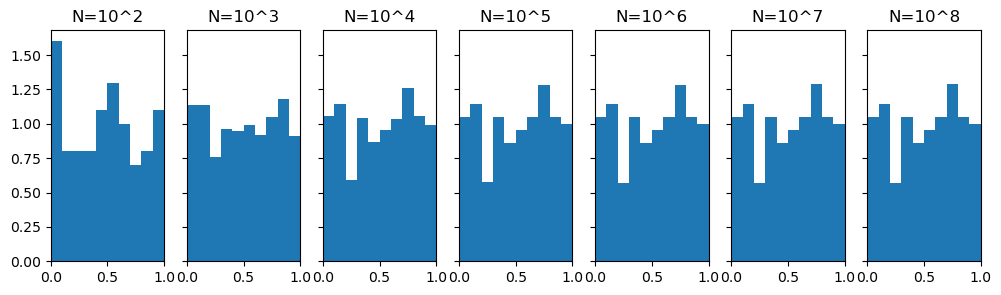

In [8]:
fig, ax = plt.subplots(ncols=7, sharex=True, sharey=True, figsize=(12, 3))

for i, o in enumerate(range(2, 9)):
    ax[i].hist(random_numbers[:10**o], bins=10, range=(0,1), density=True)
    ax[i].set_title(f"N=10^{o}")
    print(f"{10**8:>12}:{np.mean(random_numbers[:10**o]):>10.3f}{np.std(random_numbers[:10**o]):>10.3f}")

ax[0].set_xlim(0, 1)
plt.show()

## Python Libraries for Generating Random Numbers ##

There are PRNGs available in Python through the following libraries:

1. Python's `random` library

    In Python, the default PRNG is the Mersenne Twister. This is a good general-purpose PRNG for statistical tasks; however, it is not without its shortcomings. I encourage you to read more about the Mersenne Twister before applying it in your programs, especially if you're using it for something beyond just generating initial conditions (e.g. for Monte Carlo). By default, this generator is seeded using your computer's system time. Of course, you can also set your own seed so that your results will be reproducible. The documentation is available [here](https://docs.python.org/3/library/random.html).

In [9]:
# RANDOM LIBRARY EXAMPLES
from random import random

# You can easily generate a single random number using your system time as your seed
print(f"A random number: {random()}")

# You can also import the seed function if you want to set the seed so that your results are reproducible
from random import seed
seed(1) # Set the seed. Here, I'm using 1. Don't actually use 1.
print(f"A random number seeded with 1: {random()}")

# You could generate a list of random numbers
seed() # Not setting the seed
print(f"A list of 3 random numbers:{[random() for _ in range(3)]}")

# Just to prove the seeding worked
seed(1)
print(f"The same random number as before (seeded with 1): {random()}")

A random number: 0.8454621433109796
A random number seeded with 1: 0.13436424411240122
A list of 3 random numbers:[0.9730271335439616, 0.5733676720916158, 0.0359851416643614]
The same random number as before (seeded with 1): 0.13436424411240122


2. The `numpy` library (*Recommended*)
    
    The legacy random number generator in numpy, `numpy.random.rand()`, also uses the Mersenne Twister by default. The newer random number generator infrastructure in numpy (which you should use) provides a variety of PRNGs, but by default uses the Permuted Congruential Generator, which the numpy developers argue has better statistical properties and performance than the Mersenne Twister. You can read about the numpy's new RNG infrastructure [here](https://numpy.org/doc/stable/reference/random/index.html). This infrastructure also has an advanced seeding strategy. I recommend using this option as you'll likely be using numpy anyways. 

In [10]:
# NUMPY.RANDOM LIBRARY EXAMPLES
import numpy as np

# Generate a random number
generator = np.random.default_rng()
print(f"A random number: {generator.random(3)}")

# Generate a seeded random number
generator = np.random.default_rng(np.random.SeedSequence(1)) # Set up the generator with a seed. Here I'm using 1. Once again, don't use 1.
# Note that you could also do np.random.default_rng(1), but the SeedSequence class provides an extra line of defense againts accidental seeding mistakes.
print(f"A random number seeded with 1: {generator.random()}")

# Generate an array of 3 random numbers using the default RGN:
generator = np.random.default_rng()
print(f"An array of 3 random numbers: {generator.random(3)}")

# Proving that the seeding worked. Also note that you don't have to assign np.random.default_rng() to a variable. Doing so just makes your code a little messy.
print(f"The same random number as before (seeded with 1): {np.random.default_rng(np.random.SeedSequence(1)).random()}")

# So far, we've been getting random numbers in a uniform distribution, but what if we want our random numbers to form a normal distribution? Note that there are other distributions available; See the documentation.
print(f"An array of 3 random numbers from a standard normal distribution: {np.random.default_rng().standard_normal(3)}")

# Finally, what if we want to use a different PRNG in numpy?
print(f"A random number generated with the Mersenne Twister: {np.random.Generator(np.random.MT19937()).random()}")

# Which also has a shorthand in numpy (performing random number generation in the old way)
print(f"A random number generated with the Mersenne Twister in the old way: {np.random.rand()}")

random_numbers = generator.random(10**8)

A random number: [0.41442309 0.68032643 0.52008339]
A random number seeded with 1: 0.5118216247002567
An array of 3 random numbers: [0.05483007 0.68351846 0.43674472]
The same random number as before (seeded with 1): 0.5118216247002567
An array of 3 random numbers from a standard normal distribution: [ 1.51875892 -1.40948268 -1.13912718]
A random number generated with the Mersenne Twister: 0.7415861868308409
A random number generated with the Mersenne Twister in the old way: 0.4999869561958965


   100000000:     0.460     0.289
   100000000:     0.491     0.288
   100000000:     0.501     0.289
   100000000:     0.500     0.289
   100000000:     0.500     0.289
   100000000:     0.500     0.289
   100000000:     0.500     0.289


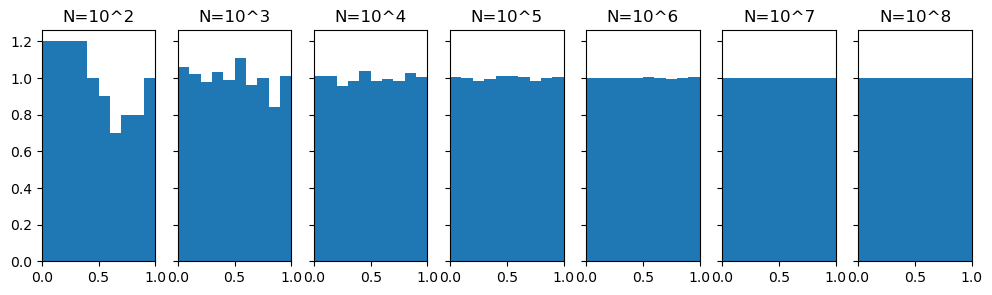

In [11]:
fig, ax = plt.subplots(ncols=7, sharex=True, sharey=True, figsize=(12, 3))

for i, o in enumerate(range(2, 9)):
    ax[i].hist(random_numbers[:10**o], bins=10, range=(0,1), density=True)
    ax[i].set_title(f"N=10^{o}")
    print(f"{10**8:>12}:{np.mean(random_numbers[:10**o]):>10.3f}{np.std(random_numbers[:10**o]):>10.3f}")

ax[0].set_xlim(0, 1)
plt.show()